# PCA for Viz (Practice)

<div id="todo_description"><table style="background-color: rgb(13,32,76); border-radius: 10px">
	<thead>
		<tr>
			<th colspan="2" style="border: hidden; vertical-align: top;" width="15%"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1674755226__Icons_400px_Practice Assignment.png">
			</th>
			<th style="border: hidden;">
				<h1 style="color: white;">PCA for Data Visualization Exercise (Practice)</h1>
			</th>
		</tr>
	</thead>
</table>
<p>This practice assignment will reinforce important learning objectives from the previous lesson(s), and allow you to take on more challenging core assignments, preparing you for graduation.<br></p>
<p>Practice and tinker with this assignment until you're comfortable performing each of the tasks. Then, be sure to submit your output as described in the steps below.</p>
<hr>
<h1>Assignment:</h1>
<p>One use of Principal Component Analysis is to reduce the dimensionality of datasets for the purpose of visualization. For this assignment, we will return to the <a href="https://drive.google.com/file/d/1Jyu1qtuqGewyfhUdpOfdZYCj6o6b4FE1/view?usp=sharing" target="_blank">Ames Housing data</a>​ from the Intro to ML course.&nbsp;</p><p>1) When reading in the data, set the index to "PID"</p><p>2) Define X and y as we did previously. We will drop some columns</p><pre data-language="python"><span class="comment"># list of cols to drop</span>
drop_from_model <span class="keyword operator">=</span> [<span class="string">'Utilities'</span>, <span class="string">"Street"</span>,<span class="string">'MS Zoning'</span>,<span class="string">'Lot Frontage'</span>,
                   <span class="string">'Lot Area'</span>,<span class="string">'Neighborhood'</span>,<span class="string">'Year Built'</span>]

X <span class="keyword operator">=</span> df.<span class="function call">drop</span>(columns <span class="keyword operator">=</span> [<span class="keyword operator">*</span>drop_from_model,<span class="string">'SalePrice'</span>])
y <span class="keyword operator">=</span> df[<span class="string">'SalePrice'</span>]
<button class="copy_code_snippet_btn">copy</button></pre><p>3) Perform a train test split and transform the data as we did in the "<a href="https://login.codingdojo.com/m/688/16336/121072" target="_blank">Regression Metrics</a>​"&nbsp;Lesson in week 2 of Intro to Machine Learning.&nbsp;</p><p>4) Once you have transformed X_train and X_test, (X_train_tf, and X_test_tf), add one more round of scaling that will also scale the one hot encoded features.</p><p>5A) Instantiate a PCA object that will find the first 3 principal components (set n_components=3).</p><p>5B) Fit the PCA object on the scaled X_train data and transform both the scaled_X_train and scaled_X_test to create X_train_pcs and X_test_pcs.<br></p><p>6) Run code to determine the amount of variance explained by the 3 Principal Components.</p><p>7) Combine the dataset for EDA:&nbsp; Concatenate X_train_pcs, X_test_pcs, and y_train and y_test back into a single DataFrame with the 3 PCs and the target as the columns and all of the data as the rows.&nbsp;</p><ul><li>Tip: Use pd.concat() 3 times.&nbsp;<ul><li>First, to combine X_train_pcs and y_train into plot_df_train using axis=1.&nbsp;</li><li>Second, combine X_test_pcas and y_test into plot_df_test using axis=1</li><li>Finally, combine the 2 combined data frames (plot_df_train, plot_df_test) into 1 final combined plot_df using axis=0.</li></ul></li></ul><p>8) Make a seaborn pairplot of the data.</p><p>9) Make a 3d scatter plot with Plotly&nbsp;Express.</p><p><br></p><p><a href="https://github.com/coding-dojo-data-science/curriculum-dev-intermediate-ml/blob/main/Wk1%20-%20Dimensionality%20Reduction/Solutions%20and%20Starters/SOLUTION_Practice%20PCA%20for%20Viz.ipynb" target="_blank">Solution</a>​</p><p><br></p>
        </div>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

link to shared csv https://drive.google.com/file/d/1Jyu1qtuqGewyfhUdpOfdZYCj6o6b4FE1/view?usp=sharing

In [2]:
# Load Ames for ML
fpath = "Data/ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df = df.set_index("PID")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2440 non-null   float64
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             198 non-null    object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2929 non-null   float64
 16  Total Bsmnt Sqft  2929 non-nu

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,3,2006,3.0,1.0
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,4,2007,1.0,0.0
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,6,2008,3.0,0.0
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,2,2007,3.0,0.0


In [3]:
# list of cols to drop
drop_from_model = ['Utilities', "Street",'MS Zoning','Lot Frontage',
                   'Lot Area','Neighborhood','Year Built']

X = df.drop(columns = [*drop_from_model,'SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Alley,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,
905475520,NaN,1Fam,1Story,4,5,1994,TA,TA,0.0,0.0,N,943.0,3,1,5,Detchd,1958.0,1.0,308.0,TA,TA,N,NaN,8,2007,1.0,0.0
909254010,NaN,1Fam,2Story,7,8,1990,TA,TA,600.0,600.0,Y,1228.0,3,1,6,Detchd,1918.0,1.0,215.0,Fa,TA,Y,MnPrv,5,2009,1.0,0.0
531450090,NaN,1Fam,1Story,6,5,1991,TA,TA,78.0,1278.0,Y,1294.0,3,1,6,Attchd,1991.0,2.0,496.0,TA,TA,Y,GdWo,6,2008,3.0,0.0
903400040,Pave,1Fam,2Story,6,6,1950,TA,TA,764.0,764.0,Y,1824.0,3,1,8,Detchd,1940.0,2.0,520.0,TA,TA,N,GdPrv,7,2007,1.0,0.0
527107130,NaN,1Fam,SLvl,7,5,1997,TA,TA,100.0,384.0,Y,1628.0,3,1,7,BuiltIn,1996.0,2.0,390.0,TA,TA,Y,NaN,6,2009,2.0,1.0


<Axes: >

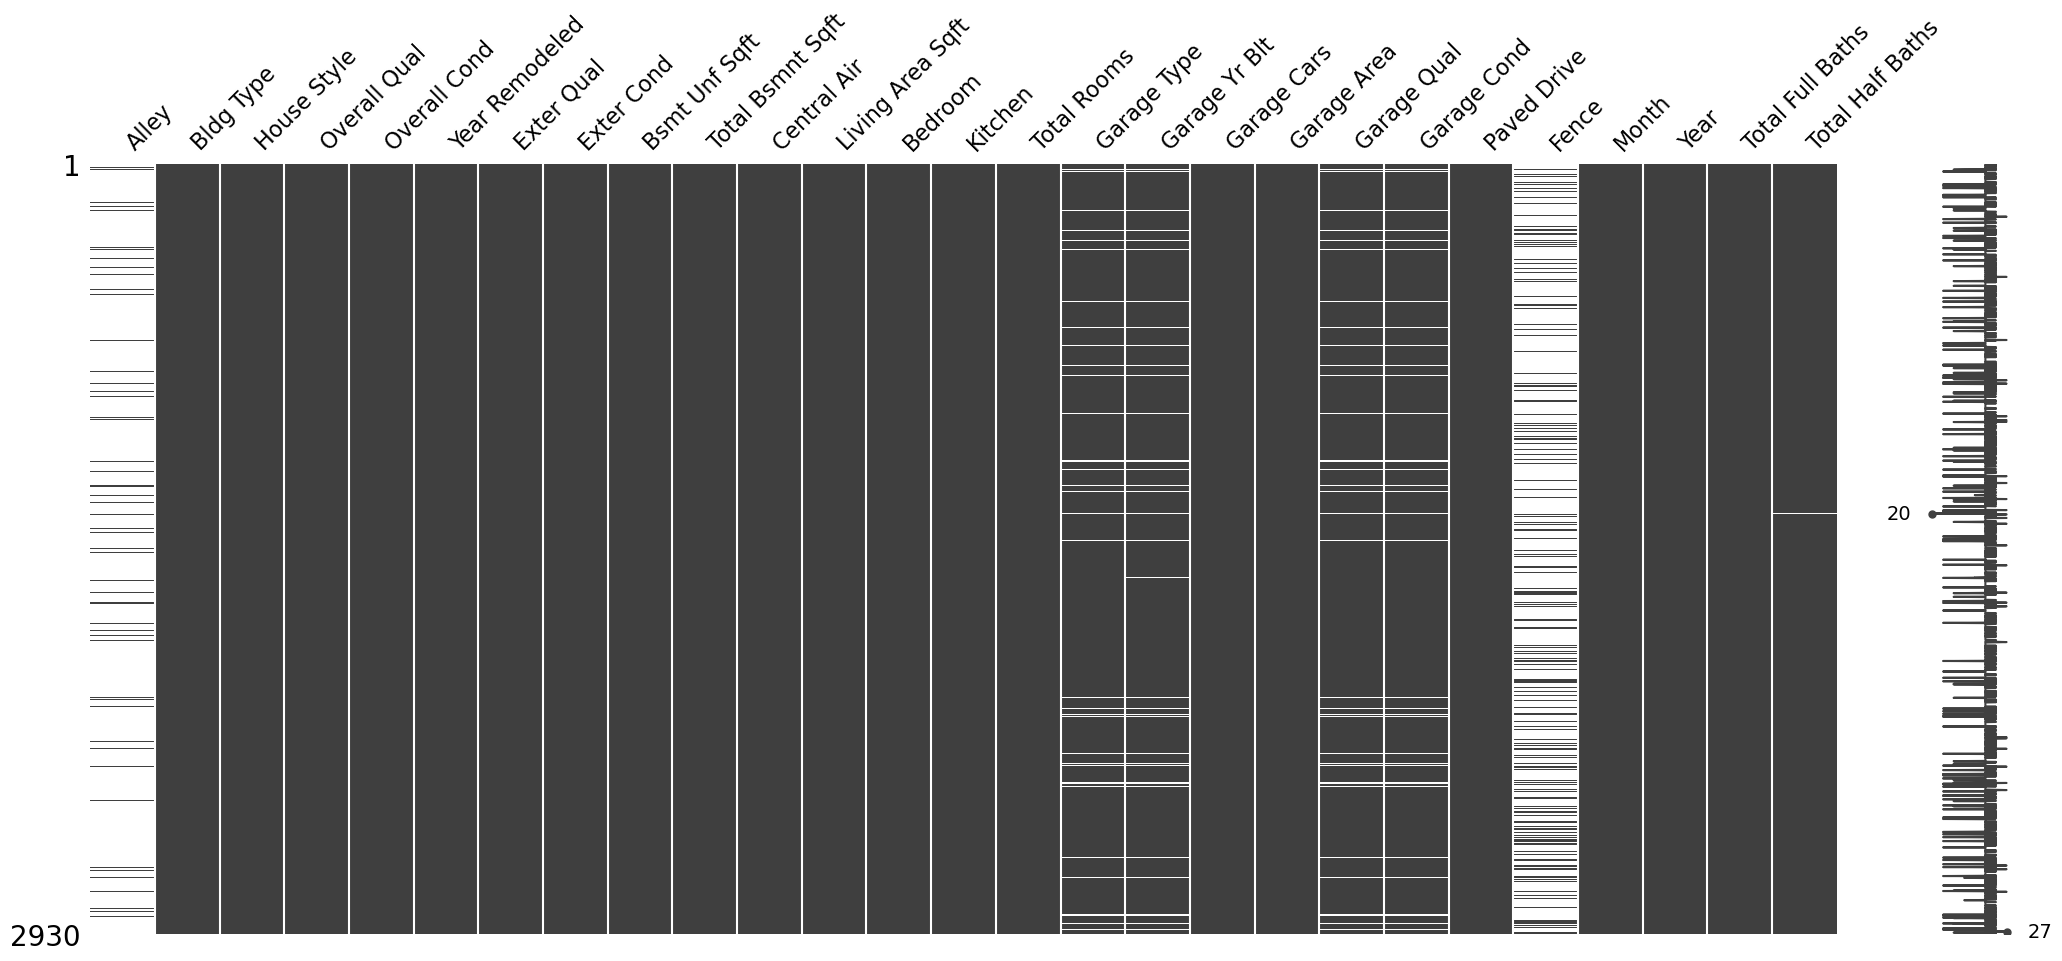

In [4]:
import missingno as msno
msno.matrix(X)

In [5]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths', 'Total Half Baths'],
      dtype='object')


In [6]:
## PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Exter Qual','Exter Cond', 'Garage Qual',"Garage Cond"]
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data 
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order, qual_cond_order,
                           qual_cond_order, qual_cond_order]                           
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe 
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
## Making an ordinal_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ord_tuple = ('ordinal', ord_pipe, ord_cols)

Ordinal Columns: ['Exter Qual', 'Exter Cond', 'Garage Qual', 'Garage Cond']


In [7]:
## PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object')


In [8]:
# Create the Column Transformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], 
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [9]:
# fit the column transformer on X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

,Overall Qual,Overall Cond,Year Remodeled,Bsmt Unf Sqft,Total Bsmnt Sqft,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Yr Blt,Garage Cars,Garage Area,Month,Year,Total Full Baths,Total Half Baths,Exter Qual,Exter Cond,Garage Qual,Garage Cond,Alley_Grvl,Alley_NA,Alley_Pave,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
905475520,-1.453681,-0.502192,0.472590,-1.282165,-2.329907,-1.086450,0.183403,-0.203499,-0.909803,-0.820130,-0.989438,-0.743628,0.674753,-0.605551,-1.289301,-0.807982,-0.679141,-0.227105,0.282215,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
909254010,0.648845,2.193205,0.282376,0.093593,-0.996395,-0.525568,0.183403,-0.203499,-0.275453,-2.455923,-0.989438,-1.169681,-0.439858,0.908844,-1.289301,-0.807982,-0.679141,-0.227105,-1.092567,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
531450090,-0.051997,-0.502192,0.329930,-1.103317,0.510475,-0.395679,0.183403,-0.203499,-0.275453,0.529399,0.313016,0.117642,-0.068321,0.151646,1.343221,-0.807982,-0.679141,-0.227105,0.282215,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
903400040,-0.051997,0.396274,-1.619758,0.469633,-0.631901,0.647364,0.183403,-0.203499,0.993247,-1.556237,0.313016,0.227591,0.303216,-0.605551,-1.289301,-0.807982,-0.679141,-0.227105,0.282215,0.272525,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
527107130,0.648845,-0.502192,0.615250,-1.052872,-1.476459,0.261635,0.183403,-0.203499,0.358897,0.733873,0.313016,-0.367968,-0.068321,0.908844,0.026960,1.050800,-0.679141,-0.227105,0.282215,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

In [11]:
# Instantiate PCA to make 3 principal components
pca = PCA(n_components=3)
# Create and define the principal components
PCA_X_train = pca.fit_transform(scaled_X_train)
PCA_X_test = pca.transform(scaled_X_test)
# Preview the results
PCA_X_train.head()

,pca0,pca1,pca2
PID,,,
905475520,5.288612,0.290287,0.229062
909254010,2.381028,-1.224990,-2.875775
531450090,-0.605740,-1.876011,0.428886
903400040,2.701565,1.369263,-3.490806
527107130,-0.947556,0.621437,-1.637986


In [12]:
PCA_X_test.head()

,pca0,pca1,pca2
PID,,,
535477060,-0.101095,-0.312740,-1.162165
535302140,3.657138,-1.891303,-0.287174
907290090,-2.070634,-0.267805,1.650145
528138030,-4.803500,3.729775,-1.244305
908275280,1.144757,-0.691666,-2.085270


In [13]:
# Sum of variance explained by 3 principal components
pca.explained_variance_ratio_.sum()

0.2844300083495136

In [14]:
# combine X and y for test data
combined_test = pd.concat([PCA_X_test, y_test], axis = 1)
combined_test.head()

,pca0,pca1,pca2,SalePrice
PID,,,,
535477060,-0.101095,-0.312740,-1.162165,155000.0
535302140,3.657138,-1.891303,-0.287174,130000.0
907290090,-2.070634,-0.267805,1.650145,213000.0
528138030,-4.803500,3.729775,-1.244305,345000.0
908275280,1.144757,-0.691666,-2.085270,135500.0


In [15]:
# Combine X and y for train data
combined_train = pd.concat([PCA_X_train, y_train], axis = 1)
combined_train.head()

,pca0,pca1,pca2,SalePrice
PID,,,,
905475520,5.288612,0.290287,0.229062,80000.0
909254010,2.381028,-1.224990,-2.875775,137000.0
531450090,-0.605740,-1.876011,0.428886,179200.0
903400040,2.701565,1.369263,-3.490806,180500.0
527107130,-0.947556,0.621437,-1.637986,189000.0


In [16]:
# Combine train and test for complete eda dataset
pca_eda = pd.concat([combined_test, combined_train], axis = 0)
pca_eda

,pca0,pca1,pca2,SalePrice
PID,,,,
535477060,-0.101095,-0.312740,-1.162165,155000.0
535302140,3.657138,-1.891303,-0.287174,130000.0
907290090,-2.070634,-0.267805,1.650145,213000.0
528138030,-4.803500,3.729775,-1.244305,345000.0
908275280,1.144757,-0.691666,-2.085270,135500.0
...,...,...,...,...
527402220,0.845801,-2.482614,-1.197199,148500.0
528435030,-3.295269,0.033720,1.507263,287090.0
528218090,-2.036847,1.014009,-0.370910,184000.0


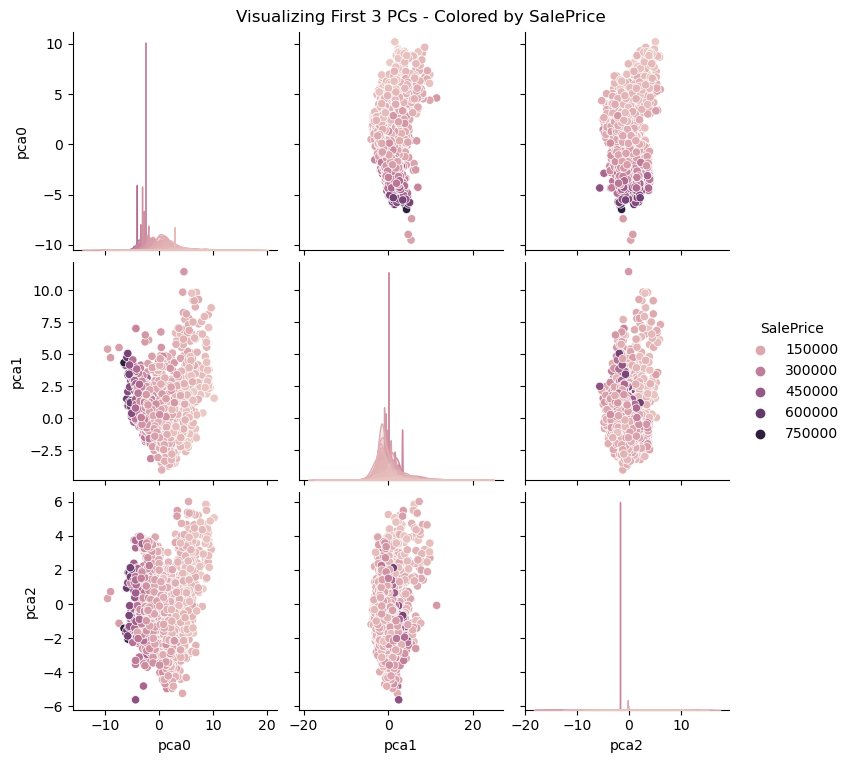

In [17]:
# Plot with color coding based on target
g_pca = sns.pairplot(data=pca_eda,  vars=PCA_X_train.columns, hue='SalePrice')
g_pca.fig.suptitle('Visualizing First 3 PCs - Colored by SalePrice', y=1.01);

In [18]:
import plotly.express as px
import plotly.io as pio

In [19]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [20]:
# Define mini function to adjust marker size and turn off scrollzoom
def update_scatter3d(fig):
    fig.update_traces({'marker':{'size':3}})
    fig.show(config={'scrollZoom':False})
# Make 3d scatterplot using plotly_white
fig = px.scatter_3d(pca_eda, x='pca0',y='pca1',z='pca2', width=800, height=600, color = "SalePrice", template = 'plotly_white')
# Call custom function
update_scatter3d(fig)